### **Classify Images Using Convolutional Neural Networks & Python**


- **Project**: -
- **Created**: Sun, 18th Dec 2022 1:16:39 PM
- **Author**: F. Waskito
- **Reference**: Randerson. (July 12, 2019). Classifiy Images Using Convolutional Neural Network & Python. Medium.com. https://randerson112358.medium.com/classify-images-using-convolutional-neural-networks-python-a89cecc8c679

In [1]:
# Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('fivethirtyeight')

In [2]:
# Current working directory
os.getcwd()

'/content'

In [3]:
# The Tensorflow flag to ignore the warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
# Load the data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


#### **Explore The Data**

**Print the data type of train dan test set**

In [5]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**Get shape of train and test set**

In [6]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


**Take a look the image**

In [7]:
index = 0
X_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

**Show the image as an image instead**

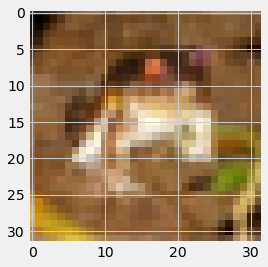

In [8]:
img = plt.imshow(X_train[index])

**Print the label of the image**

In [9]:
print('The image lable is: ', y_train[index])

The image lable is:  [6]


**Show the label classification in relation to the number**

In [10]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                'frog', 'horse', 'ship', 'truck']
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


In [11]:
print('Number ', 'Label')
print('-------------------------')
for i in range(len(classification)):
    print(str(i).ljust(7), str(classification[i]).ljust(5))

Number  Label
-------------------------
0       airplane
1       automobile
2       bird 
3       cat  
4       deer 
5       dog  
6       frog 
7       horse
8       ship 
9       truck


**One-Hot Encoding (for label)**

In [12]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [13]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [14]:
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [15]:
# Print example of the new labels
# using the firs image in the training set
print('The one-hot label is: ', y_train_one_hot[0])

The one-hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Normalize the pixels**

In [16]:
X_train = X_train / 255

In [17]:
X_test = X_test / 255

#### **Bulit The Convolutional Neural Network**

In [18]:
model = Sequential()
# Convolutional and pooling layers
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# Neural Nets dropout layers
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

**Compile the model**

In [19]:
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

### **Training The Model**

In [20]:
hist = model.fit(X_train, y_train_one_hot,
                    batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 11s 16ms/step - loss: 1.8620 - accuracy: 0.3010 - val_loss: 1.5114 - val_accuracy: 0.4392
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 1.4422 - accuracy: 0.4692 - val_loss: 1.2830 - val_accuracy: 0.5336
Epoch 3/10
157/157 [==============================] - 2s 12ms/step - loss: 1.2595 - accuracy: 0.5475 - val_loss: 1.1739 - val_accuracy: 0.5846
Epoch 4/10
157/157 [==============================] - 2s 12ms/step - loss: 1.1414 - accuracy: 0.5918 - val_loss: 1.1252 - val_accuracy: 0.6040
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 1.0414 - accuracy: 0.6297 - val_loss: 1.0934 - val_accuracy: 0.6098
Epoch 6/10
157/157 [==============================] - 2s 13ms/step - loss: 0.9624 - accuracy: 0.6592 - val_loss: 1.0481 - val_accuracy: 0.6305
Epoch 7/10
157/157 [==============================] - 2s 12ms/step - loss: 0.8773 - accuracy: 0.6904 - val_loss: 0.9733 - val_accuracy: 0.665

In [21]:
model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.9162 - accuracy: 0.6864


0.6863999962806702

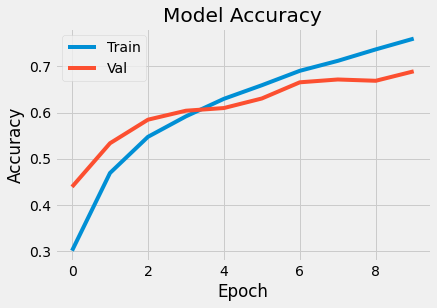

In [22]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Visualize the model loss**

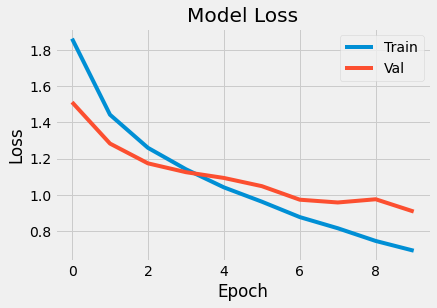

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### **Test The Model**

**Upload image**

In [24]:
print('Number ', 'Label')
print('-------------------------')
for i in range(len(classification)):
    print(str(i).ljust(7), str(classification[i]).ljust(5))

Number  Label
-------------------------
0       airplane
1       automobile
2       bird 
3       cat  
4       deer 
5       dog  
6       frog 
7       horse
8       ship 
9       truck


In [25]:
# Use to upload data on Goole Colab
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print('\nName of the image file: ',file_name)

# Read in the image (3, 14, 20)
new_image = plt.imread(file_name)

Saving dog.4001.jpg to dog.4001.jpg

Name of the image file:  dog.4001.jpg


**Show the uploaded image**

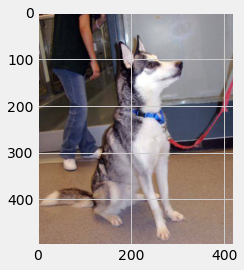

In [26]:
img = plt.imshow(new_image)

**Resize the image**

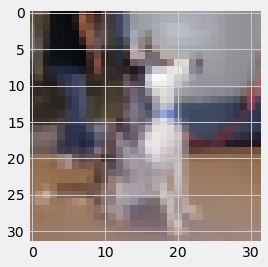

In [27]:
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

**Get the predictions**

In [28]:
predictions = model.predict(np.array([resized_image]))

1/1 [==============================] - 0s 175ms/step


**Show the predictions**

In [29]:
predictions

array([[0.03299452, 0.00103928, 0.07510948, 0.26272848, 0.07373911,
        0.29378518, 0.00298942, 0.23742712, 0.01253734, 0.00765005]],
      dtype=float32)

**Sort the predictions**

In [30]:
list_index = [0,1,2,3,4,5,6,7,8,9]

x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# SHow the sorted labels in order from highest probability to lowest
print(list_index)

[5, 3, 7, 2, 4, 0, 8, 9, 6, 1]


**Print the first 5 most likely classes**

In [31]:
i = 0
for i in range(5):
  print(classification[list_index[i]],
        ':', 
        round(predictions[0][list_index[i]] * 100, 2),
        '%')


dog : 29.38 %
cat : 26.27 %
horse : 23.74 %
bird : 7.51 %
deer : 7.37 %


***

**Save this model**

In [32]:
model.save('my_model.h1')

**To load this model later**

In [ ]:
from keras.models import load_model
model = load_model('my_model.h1')